In [233]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Data

In [234]:
n = 2
m = 5

y = np.array([[1.8, 2.5],
            [2.0, 1.7],
            [1.5, 1.5],
            [1.5, 2.0],
            [2.5, 1.5]])

d = np.array([2.00, 1.24, 0.59, 1.31, 1.44])

### Construct SDP

In [235]:
Y = np.ones((m,n+1))
Y[:,:n] = -2*y

b = np.sum(y*y, axis=1)-d*d

P = np.eye(n+1)
P[n,n]=0

q = np.zeros(n+1)
q[-1] = -0.5

Write SDP as:
$$ A_0 + v A_1 + s A_2 \geq 0 $$
Where $A_0, A_1, A_2 \in S^4$

In [236]:
A0 = np.zeros((4,4))
A0[:3,:3] = Y.T@Y
A0[:3, 3] = Y.T@b
A0[3,:3] = (Y.T@b).T

A1 = np.zeros((4,4))
A1[:3,:3] = P
A1[:3,3] = q
A1[3,:3] = q.T

A2 = np.zeros((4,4))
A2[-1,-1] = 1

### CVXPY Optimization

In [237]:
v = cp.Variable(1)
s = cp.Variable(1)

objective = cp.Maximize(-s+b.T@b)
constraint = [A0 + v*A1+s*A2 >> 0]

problem = cp.Problem(objective, constraint)
problem.solve()

v_sol = v.value
print(f"Optimal Value of v = {v_sol}")

Optimal Value of v = [0.58972426]


### Solving for z from KKT Conditions

In [238]:
z = - np.linalg.inv(Y.T@Y+v_sol*P) @ (Y.T@b + v_sol*q)
print(f"Optimal z = {z}")

Optimal z = [1.32691621 0.64462691 2.17640776]


### Plot

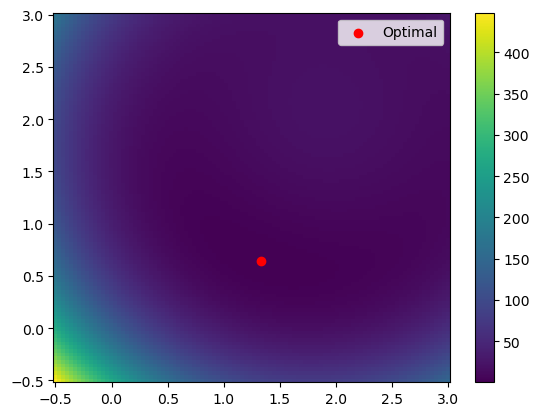

In [239]:
xx = np.linspace(-0.5,3,100)
yy = np.linspace(-0.5,3,100)

XX,YY = np.meshgrid(xx, yy)

def cost_vec(X,Y):
    cost = np.zeros(X.shape)
    for i in range(m):
        cost += ((X-y[i,0])**2+(Y-y[i,1])**2-d[i]**2)**2
    return cost

plt.pcolormesh(XX,YY,cost_vec(XX,YY))
plt.colorbar()
plt.scatter(z[0], z[1], color="red", label="Optimal")
plt.legend()
plt.show()